In [1]:
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
basedir = os.path.abspath(os.getcwd())
src_dir = os.path.abspath(os.path.join(basedir, '..'))
src_dir

'/home/denis/RustSSFM/RSSFM4D/src'

In [10]:
x0 = np.load(src_dir + "/arrays_saved/x0.npy")
x1 = np.load(src_dir + "/arrays_saved/x1.npy")
x2 = np.load(src_dir + "/arrays_saved/x2.npy")
x3 = np.load(src_dir + "/arrays_saved/x3.npy")
atomic_potential = np.load(src_dir + "/arrays_saved/atomic_potential.npy")
psi_initial = np.load(src_dir + "/arrays_saved/psi_initial.npy")
index_x_zero = np.zeros(4)
index_x_zero[0] = np.argmin(np.abs(x0))
index_x_zero[1] = np.argmin(np.abs(x1))
index_x_zero[2] = np.argmin(np.abs(x2))
index_x_zero[3] = np.argmin(np.abs(x3))

In [11]:
def Psi_and_V(X, psi0, V_potential, V_absorbing):
    rows, cols = [3, 6]
    fig, ax = plt.subplots(rows, cols, figsize=(18, 8), layout="constrained")
    b = [None, None, None, None, None, None]

    ax_xlabels = ["x1", "x1", "x1", "x2", "x2", "y1"]
    ax_ylabels = ["y1", "x2", "y2", "y1", "y2", "y2"]

    X1_ind = [0, 0, 0, 2, 2, 1]
    X2_ind = [1, 2, 3, 1, 3, 3]

    slice_ax_first = [3, 3, 2, 3, 1, 2]
    slice_ax_second = [2, 1, 1, 0, 0, 0]

    # --- Пояснение, как работают эти срезы (понять сложно, но можно) ---
    # X1_collect = [
    #     X[0][:, :, 0, 0],  # x1 y1
    #     X[0][:, 0, :, 0],  # x1 x2
    #     X[0][:, 0, 0, :],  # x1 y2
    #     X[2][0, :, :, 0],  # x2 y1
    #     X[2][0, 0, :, :],  # x2 y2
    #     X[1][0, :, 0, :],  # y1 y2
    # ]
    #
    # X2_collect = [
    #     X[1][:, :, 0, 0],  # x1 y1
    #     X[2][:, 0, :, 0],  # x1 x2
    #     X[3][:, 0, 0, :],  # x1 y2
    #     X[2][0, :, :, 0],  # x2 y1
    #     X[3][0, 0, :, :],  # x2 y2
    #     X[3][0, :, 0, :],  # y1 y2
    # ]
    # X1_ind = [0,0,0,2,2,1]
    # X2_ind = [1,2,3,1,3,2]
    # axis_ind_first = [3,3,2,3,1,3]
    # axis_ind_second =[2,1,1,0,0,0]
    # ---------------------------------------

    for col in range(cols):
        X1 = (
            X[X1_ind[col]]
            .take(indices=0, axis=slice_ax_first[col])
            .take(indices=0, axis=slice_ax_second[col])
        )

        X2 = (
            X[X2_ind[col]]
            .take(indices=0, axis=slice_ax_first[col])
            .take(indices=0, axis=slice_ax_second[col])
        )

        slice_ind_first = index_x_zero[slice_ax_first[col]]
        slice_ind_second = index_x_zero[slice_ax_second[col]]

        b[0] = ax[0, col].pcolormesh(
            X1,
            X2,
            np.abs(
                psi0.take(indices=slice_ind_first, axis=slice_ax_first[col]).take(
                    indices=slice_ind_second, axis=slice_ax_second[col]
                )
            )
            ** 2,
            cmap=cm.jet,
            shading="auto",
            vmax=1e-3,
            vmin=0,
        )
        b[1] = ax[1, col].pcolormesh(
            X1,
            X2,
            V_potential.take(indices=slice_ind_first, axis=slice_ax_first[col]).take(
                indices=slice_ind_second, axis=slice_ax_second[col]
            ),
            cmap=cm.jet,
        )
        b[2] = ax[2, col].pcolormesh(
            X1,
            X2,
            np.abs(
                V_absorbing.take(
                    indices=slice_ind_first, axis=slice_ax_first[col]
                ).take(indices=slice_ind_second, axis=slice_ax_second[col])
            ),
            cmap=cm.jet,
        )
        for row in range(rows):
            plt.colorbar(b[row], ax=ax[row, col], fraction=0.046, pad=0.001)
            ax[row, col].set(
                xlabel=ax_xlabels[col], ylabel=ax_ylabels[col], aspect="equal"
            )
    plt.show()


In [12]:
X = np.meshgrid(x0, x1, x2, x3, indexing='ij')

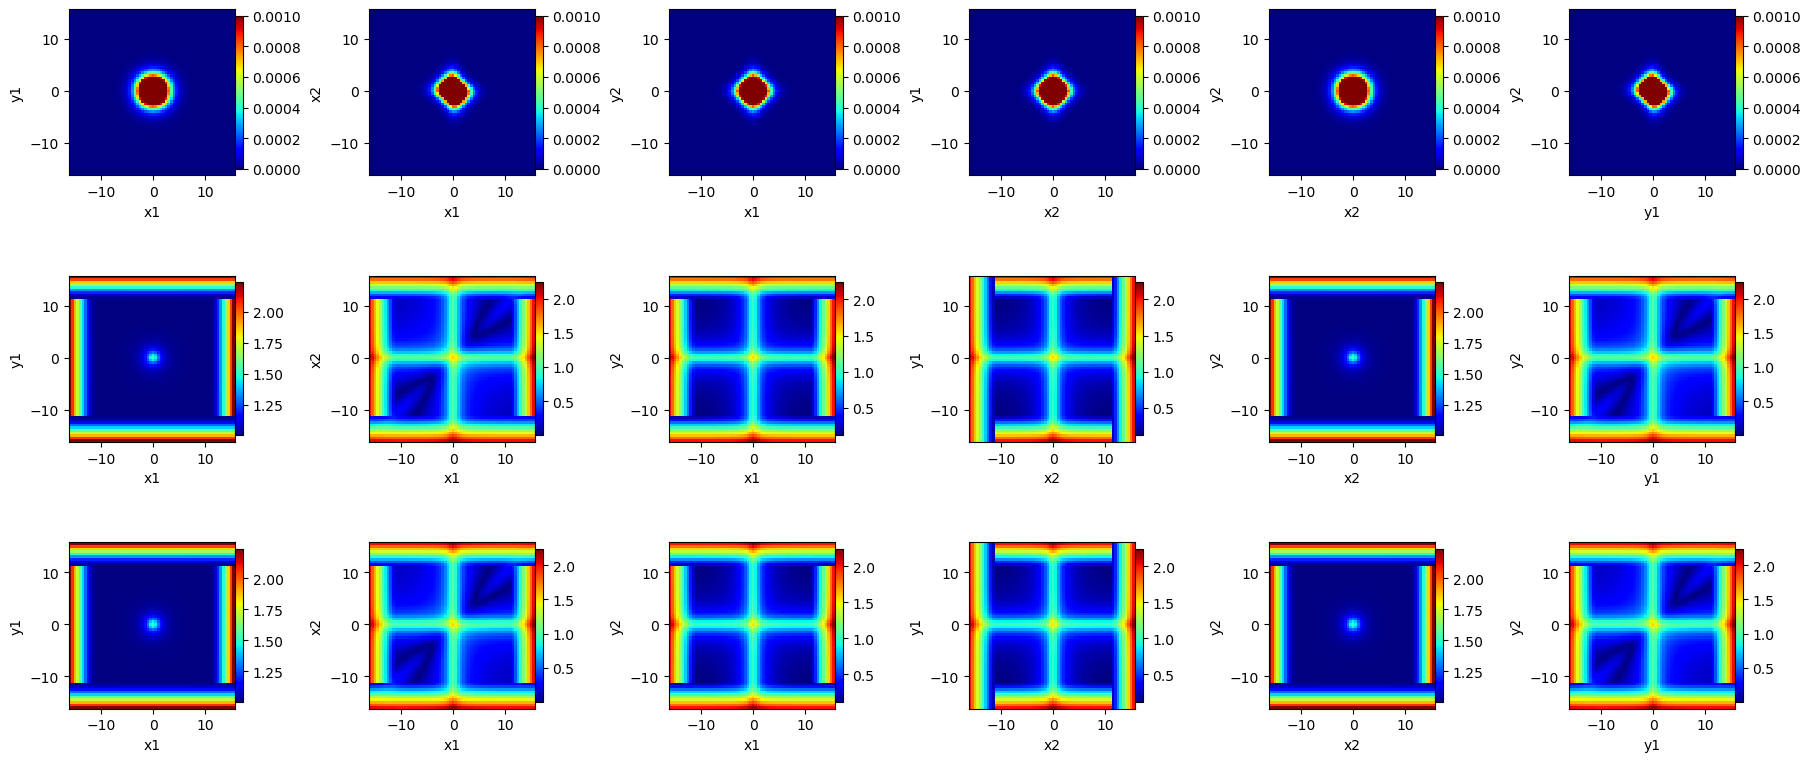

In [13]:
Psi_and_V(X, psi_initial, np.abs(atomic_potential), atomic_potential)